In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### K-fold Cross Validation

In [8]:
from sklearn.datasets import load_boston

boston = load_boston()

In [9]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["target"])

df = pd.concat([dfX, dfy], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=12)

In [11]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

In [12]:
ridge.score(X_test, y_test)

0.7495158537471983

In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score(ridge, X_train, y_train, cv=5)

array([0.55734566, 0.63337499, 0.78943866, 0.75381104, 0.64667492])

In [14]:
# another tutorial with wine dataset

wine = pd.read_csv("wine.csv")

In [15]:
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750,Wine B
1,13.52,3.17,2.72,23.5,97,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520,Wine C
2,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680,Wine A
3,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680,Wine B
4,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780,Wine C


In [16]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 14 columns):
Alcohol                          176 non-null float64
Malic acid                       176 non-null float64
Ash                              176 non-null float64
Alcalinity of ash                176 non-null float64
Magnesium                        176 non-null int64
Total phenols                    176 non-null float64
Flavanoids                       176 non-null float64
Nonflavanoid phenols             176 non-null float64
Proanthocyanins                  176 non-null float64
Color intensity                  176 non-null float64
Hue                              176 non-null float64
OD280/OD315 of diluted wines     176 non-null float64
Proline                          176 non-null int64
Class                            176 non-null object
dtypes: float64(11), int64(2), object(1)
memory usage: 19.3+ KB


In [17]:
wine.Class.value_counts()

Wine B    70
Wine A    58
Wine C    48
Name: Class, dtype: int64

In [18]:
X = wine.drop("Class", axis=1)
y = wine.Class

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [22]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression

log_rg = LogisticRegression().fit(X_train_scaled, y_train)

In [24]:
# a simple way to test
log_rg.score(X_test_scaled, y_test)

0.9772727272727273

In [25]:
cross_val_score(log_rg, X_train, y_train, cv=5)

array([0.85714286, 0.96296296, 0.92307692, 0.96153846, 0.96      ])

In [26]:
# detailed options
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [27]:
cross_val_score(log_rg, X_train, y_train, cv=kfold)

array([0.88888889, 1.        , 0.84615385, 0.96153846, 1.        ])

### LeaveOneOut

In [28]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

In [29]:
scores = cross_val_score(log_rg, X_train_scaled, y_train, cv=loo)

In [30]:
len(scores)

132

In [31]:
len(X_train_scaled)

132

In [32]:
scores.mean()

0.9696969696969697

### ShuffleSplit

In [33]:
from sklearn.model_selection import ShuffleSplit

suffle_split = ShuffleSplit(test_size=10, train_size=50, n_splits=4)

In [34]:
scores = cross_val_score(log_rg, X_train_scaled, y_train, cv=suffle_split)

In [35]:
scores

array([1. , 1. , 1. , 0.9])

### Grid Search (a simple way)

In [36]:
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750,Wine B
1,13.52,3.17,2.72,23.5,97,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520,Wine C
2,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680,Wine A
3,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680,Wine B
4,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780,Wine C


In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(132, 13)
(132,)
(44, 13)
(44,)


In [38]:
y_train.value_counts()

Wine B    49
Wine A    46
Wine C    37
Name: Class, dtype: int64

In [39]:
y_test.value_counts()

Wine B    21
Wine A    12
Wine C    11
Name: Class, dtype: int64

In [40]:
from sklearn.svm import SVC

svm = SVC()

In [41]:
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
# test result with default options
svm.score(X_test, y_test)

0.5454545454545454

In [43]:
# possibility of generalization with simple split
svm.score(X_train, y_train)

1.0

In [44]:
# possibility of generalization with Kfold CV
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

cross_val_score(log_rg, X_train, y_train, cv=kfold).mean()

0.9393162393162393

In [45]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}            

In [46]:
print(best_score)
print(best_parameters)   

0.8181818181818182
{'C': 100, 'gamma': 0.001}


In [47]:
svm_best = SVC(**best_parameters)

svm_best

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
svm_best.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
svm_best.score(X_test, y_test) # 편항된 점수

0.8181818181818182

### Grid Search with Validation set

In [50]:
from sklearn.model_selection import train_test_split

# train+val, test from all 
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# train, val from train+val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=1)

In [51]:
print(X.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(176, 13)
(99, 13)
(33, 13)
(44, 13)


In [52]:
# grid search with a sample split

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_val, y_val)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

In [53]:
print(best_score)
print(best_parameters)

0.7878787878787878
{'C': 100, 'gamma': 0.001}


In [54]:
svm = SVC(**best_parameters)

In [55]:
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
svm.score(X_test, y_test)

0.8181818181818182

In [57]:
# grid search with Kfold CV
from sklearn.model_selection import cross_val_score

best_score = 0 
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

In [58]:
print(best_score)
print(best_parameters)

0.7806552706552706
{'C': 100, 'gamma': 0.001}


In [59]:
svm = SVC(**best_parameters)

In [60]:
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
svm.score(X_test, y_test)

0.8181818181818182

In [62]:
# grid search class
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [63]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [65]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [66]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 100, 'gamma': 0.001}
0.7803030303030303


In [67]:
grid_search.score(X_test, y_test)

0.8181818181818182

In [68]:
print(grid_search.best_estimator_)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [69]:
# if wants to select certain options

param_grid = [{'kernel': ['rbf'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              
             {'kernel': ['linear'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

param_grid

[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
  'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
  'kernel': ['rbf']},
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear']}]

In [70]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [71]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [72]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'kernel': 'linear', 'C': 0.1}
0.946969696969697


In [73]:
pd.DataFrame(grid_search.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00310116,0.00283356,0.00244918,0.00168414,0.00137773,0.00140095,0.00173402,0.00174141,0.00150719,0.00134864,...,0.00164862,0.00158486,0.00153594,0.001583,0.00132399,0.00571179,0.0227327,0.0749841,0.105135,0.0931618
mean_score_time,0.00105619,0.00076046,0.000861692,0.00046196,0.000391436,0.000410652,0.000455427,0.000425196,0.000410843,0.000370979,...,0.000381374,0.000391197,0.000363636,0.000370979,0.000339222,0.000365973,0.000361633,0.000522423,0.000662041,0.000554609
mean_test_score,0.371212,0.371212,0.371212,0.371212,0.371212,0.371212,0.371212,0.371212,0.371212,0.371212,...,0.409091,0.371212,0.371212,0.371212,0.772727,0.901515,0.94697,0.924242,0.931818,0.931818
mean_train_score,0.371222,0.371222,0.371222,0.371222,0.371222,0.371222,0.371222,0.371222,0.371222,0.371222,...,1,1,1,1,0.797397,0.933795,0.979226,0.998113,1,1
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{u'kernel': u'rbf', u'C': 0.001, u'gamma': 0.001}","{u'kernel': u'rbf', u'C': 0.001, u'gamma': 0.01}","{u'kernel': u'rbf', u'C': 0.001, u'gamma': 0.1}","{u'kernel': u'rbf', u'C': 0.001, u'gamma': 1}","{u'kernel': u'rbf', u'C': 0.001, u'gamma': 10}","{u'kernel': u'rbf', u'C': 0.001, u'gamma': 100}","{u'kernel': u'rbf', u'C': 0.01, u'gamma': 0.001}","{u'kernel': u'rbf', u'C': 0.01, u'gamma': 0.01}","{u'kernel': u'rbf', u'C': 0.01, u'gamma': 0.1}","{u'kernel': u'rbf', u'C': 0.01, u'gamma': 1}",...,"{u'kernel': u'rbf', u'C': 100, u'gamma': 0.1}","{u'kernel': u'rbf', u'C': 100, u'gamma': 1}","{u'kernel': u'rbf', u'C': 100, u'gamma': 10}","{u'kernel': u'rbf', u'C': 100, u'gamma': 100}","{u'kernel': u'linear', u'C': 0.001}","{u'kernel': u'linear', u'C': 0.01}","{u'kernel': u'linear', u'C': 0.1}","{u'kernel': u'linear', u'C': 1}","{u'kernel': u'linear', u'C': 10}","{u'kernel': u'linear', u'C': 100}"
rank_test_score,17,17,17,17,17,17,17,17,17,17,...,14,17,17,17,7,5,1,4,2,2
split0_test_score,0.357143,0.357143,0.357143,0.357143,0.357143,0.357143,0.357143,0.357143,0.357143,0.357143,...,0.428571,0.357143,0.357143,0.357143,0.714286,0.785714,0.928571,0.928571,0.928571,0.928571


### Evaluation Matrics

In [151]:
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750,Wine B
2,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680,Wine A
3,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680,Wine B
5,14.22,3.99,2.51,13.2,128,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760,Wine A
6,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564,Wine B


In [152]:
wine = wine[wine['Class'] != 'Wine C']

In [153]:
wine.Class.value_counts()

Wine B    70
Wine A    58
Name: Class, dtype: int64

In [155]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [154]:
wine['Class'] = le.fit_transform(wine['Class'])

In [156]:
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750,1
2,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680,0
3,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680,1
5,14.22,3.99,2.51,13.2,128,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760,0
6,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564,1


In [157]:
X = wine.drop("Class", axis=1)
y = wine.Class

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=0.5)

In [159]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(64, 13)
(64,)
(64, 13)
(64,)


In [160]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [161]:
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

In [163]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [164]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'penalty': 'l1', 'C': 100}
1.0


In [165]:
grid_search.score(X_test_scaled, y_test)

0.984375

In [166]:
y_pred = grid_search.predict(X_test_scaled)

y_pred

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [167]:
np.array(y_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [168]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.984375

In [169]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[28,  0],
       [ 1, 35]])

In [170]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(tn)
print(fp)
print(fn)
print(tp)

28
0
1
35


In [171]:
print("Pecision :", tp / ((tp + fp) *1.0))
print("Recall :", tp / ((tp + fn) *1.0))

('Pecision :', 1.0)
('Recall :', 0.9722222222222222)


In [172]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98        28
          1       1.00      0.97      0.99        36

avg / total       0.98      0.98      0.98        64



In [173]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

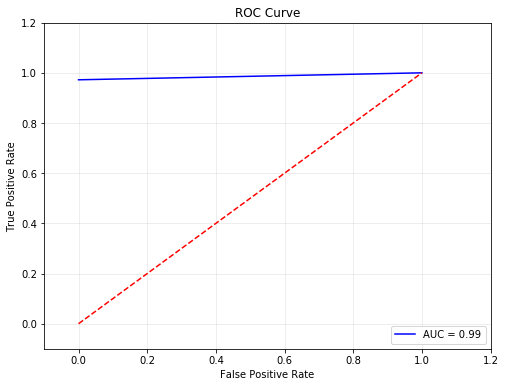

In [174]:
roc_auc = auc(false_positive_rate, true_positive_rate)

fig = plt.figure(figsize=(8,6))
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')

plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(color='lightgrey', alpha=.5)
plt.show()

### Evaluation for a regression model

In [191]:
from sklearn.datasets import load_boston

boston = load_boston()

In [192]:
bos_X = pd.DataFrame(boston.data, columns=boston.feature_names)
bos_y = pd.DataFrame(boston.target, columns=["target"])

boston = pd.concat([bos_X, bos_y], axis=1)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [231]:
X = boston.drop("target", axis=1)
y = boston.target

In [232]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [234]:
scaler = MinMaxScaler(feature_range=(0,1))

In [235]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [236]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [237]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [238]:
y_pred = lr.predict(X_test_scaled)

In [239]:
np.array(y_test)[:20]

array([22.6, 50. , 23. ,  8.3, 21.2, 19.9, 20.6, 18.7, 16.1, 18.6,  8.8,
       17.2, 14.9, 10.5, 50. , 29. , 23. , 33.3, 29.4, 21. ])

In [240]:
y_pred[:20]

array([23.23119633, 21.85694997, 28.07435418,  9.58296078, 19.53998037,
       17.48124141, 18.32644755, 19.69524433, 17.41375586, 18.38266232,
        1.48463937, 14.34206539, 15.14176571,  2.91165513, 39.24311214,
       30.87203004, 20.24714745, 35.52358536, 29.93345507, 21.6828646 ])

In [241]:
from sklearn.metrics import *

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

3.8901613990301374
34.97402464357554
5.91388405733284
